In [3]:
!pip install tensorflow==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86.3 MB 39 kB/s 
     |████████████████████████████████| 3.8 MB 33.7 MB/s 
     |████████████████████████████████| 449 kB 58.4 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=0a6b8f2c8a492535902a05ed013faba12629bcab1b1ac86854dd226572167b11
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uni

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
print(tf.__version__)

2.0.0


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
X = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [13]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


y = cancer.target

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [27]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [28]:
X.shape

(569, 30)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [30]:
X_train.shape

(455, 30)

In [31]:
X_test.shape

(114, 30)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114, 30, 1)

In [34]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [36]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 3s 7ms/sample - loss: 0.8392 - accuracy: 0.6615 - val_loss: 0.6324 - val_accuracy: 0.8772
Epoch 2/50
455/455 [==============================] - 0s 577us/sample - loss: 0.5520 - accuracy: 0.7604 - val_loss: 0.5996 - val_accuracy: 0.8860
Epoch 3/50
455/455 [==============================] - 0s 407us/sample - loss: 0.5564 - accuracy: 0.7868 - val_loss: 0.5679 - val_accuracy: 0.8947
Epoch 4/50
455/455 [==============================] - 0s 392us/sample - loss: 0.3648 - accuracy: 0.8308 - val_loss: 0.5345 - val_accuracy: 0.8860
Epoch 5/50
455/455 [==============================] - 0s 418us/sample - loss: 0.3543 - accuracy: 0.8527 - val_loss: 0.5016 - val_accuracy: 0.8860
Epoch 6/50
455/455 [==============================] - 0s 413us/sample - loss: 0.3357 - accuracy: 0.8593 - val_loss: 0.4702 - val_accuracy: 0.8860
Epoch 7/50
455/455 [==============================] - 0s 429us/sample - loss: 0.

In [38]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [39]:
history.history

{'accuracy': [0.6615385,
  0.7604396,
  0.7868132,
  0.83076924,
  0.85274726,
  0.85934067,
  0.8857143,
  0.8725275,
  0.9098901,
  0.9098901,
  0.9142857,
  0.9032967,
  0.8835165,
  0.9120879,
  0.92747253,
  0.9252747,
  0.9230769,
  0.94505495,
  0.93186814,
  0.92747253,
  0.93186814,
  0.94945055,
  0.94945055,
  0.9230769,
  0.92967033,
  0.94065934,
  0.95604396,
  0.94505495,
  0.94505495,
  0.94725275,
  0.94725275,
  0.95164835,
  0.95824176,
  0.96263736,
  0.93406594,
  0.94725275,
  0.94725275,
  0.95384616,
  0.95824176,
  0.94725275,
  0.96043956,
  0.96263736,
  0.96043956,
  0.95384616,
  0.96043956,
  0.96043956,
  0.94725275,
  0.96703297,
  0.94505495,
  0.95164835],
 'loss': [0.8391722332645248,
  0.5520301180881458,
  0.5563850961543702,
  0.364838090800977,
  0.3543044193432881,
  0.3357105199452285,
  0.2890393544029404,
  0.3028548519034962,
  0.22106269403145865,
  0.2291188964149454,
  0.2302146913586082,
  0.2591228398770749,
  0.2895793218206573,
  0.186

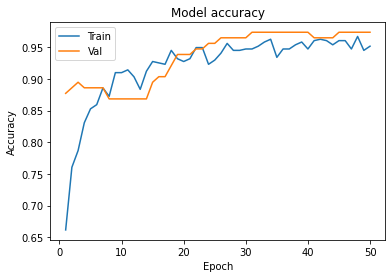

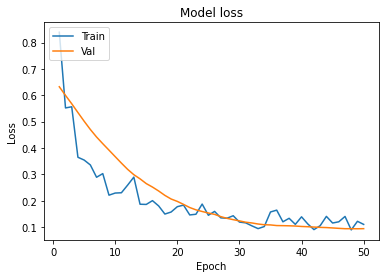

In [40]:
plot_learningCurve(history, epochs)